<a href="https://colab.research.google.com/github/DhamuSniper/Basic-Image-Processing-with-Python-with-SKimage-tool/blob/master/Basic_Image_Processing_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Image processing with Python**

1.   RGB to Grayscale conversion
2.   Flipping Images
3.   Histogram
4.   Global Thresholding
5.   Transformations - Rotate, Rescale and Resize
6.   EDGE DETECTION and SEGMENTATION



In [0]:
import skimage
from skimage import data,color

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
#utility functions
def show_image(image,title='Image',cmap_type='gray'):
  plt.imshow(image,cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

def plot_comparision(original,filtered,title_filter):
  fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,6),sharex=True,sharey=True)
  ax1.imshow(original,cmap=plt.cm.gray)
  ax1.axis('off')
  ax1.set_title('original')
  ax2.imshow(filtered,cmap=plt.cm.gray)
  ax2.axis('off')
  ax2.set_title('filtered')

def show_detected_face(result,detected,title='face_image'):
  plt.imshow(result)
  img_desc=plt.gca()
  plt.set_cmap=('gray')
  plt.title=title
  plt.axis=('off')

  for patch in detected:
    img_desc.add_patch(
        patches.Rectangle(
            (path['r'],patch['r']),
            patch['width'],
            patch['height'],
            fill=False, color='r',linewidth=2)
        )
  plt.show()

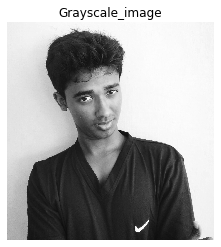

In [10]:
#RGB to Grayscale conversion
image=plt.imread('Dhamu.jpg')
gray_scale1=color.rgb2gray(image)
show_image(gray_scale1,"Grayscale_image")

In [11]:
#Image shape of RGB

image.shape


(2048, 1947, 3)

In [13]:
#Image shape of gray scale

gray_scale1.shape

(2048, 1947)

FLIPPING IMAGES

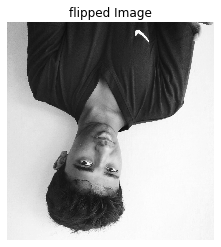

In [16]:
vertically_flipped=np.flipud(gray_scale1)
show_image(vertically_flipped,'flipped Image')

**HISTOGRAM**

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00, 7.00000e+00,
        3.00000e+00, 1.20000e+01, 2.90000e+01, 3.21000e+02, 6.22000e+02,
        1.35600e+03, 1.78800e+03, 3.52300e+03, 6.44800e+03, 7.92300e+03,
        1.19880e+04, 1.61200e+04, 2.13380e+04, 2.60390e+04, 2.98440e+04,
        3.54990e+04, 4.52970e+04, 5.01870e+04, 5.27980e+04, 5.33490e+04,
        5.47090e+04, 5.68730e+04, 5.74950e+04, 5.66370e+04, 5.61420e+04,
        5.50720e+04, 5.42850e+04, 5.28450e+04, 5.27340e+04, 5.04870e+04,
        4.67210e+04, 3.77670e+04, 3.89940e+04, 3.47350e+04, 3.15830e+04,
        2.90010e+04, 2.69000e+04, 2.44240e+04, 2.31670e+04, 2.29090e+04,
        2.17990e+04, 2.13680e+04, 2.03350e+04, 1.96130e+04, 1.84160e+04,
        1.77090e+04, 1.63140e+04, 1.51400e+04, 1.42290e+04, 1.32780e+04,
        1.27800e+04, 1.20460e+04, 1.12620e+04, 1.09660e+04, 1.00510e+04,
        9.39000e+03, 8.53600e+03, 7.73900e+03, 7.14

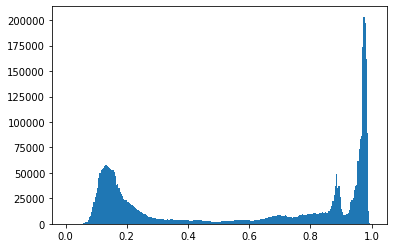

In [18]:
#It gives the intensity of the pixels values form 0 to 255

plt.hist(gray_scale1.ravel(),bins=256)

**Threshold for Background and forground separation**

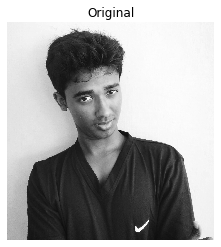

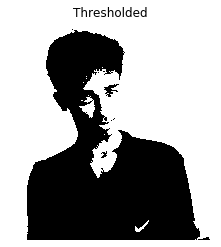

In [19]:
#Global #uniform_background

from skimage.filters import threshold_otsu
thresh= threshold_otsu(gray_scale1)
binary_global= gray_scale1 > thresh
show_image(gray_scale1,'Original')
show_image(binary_global,'Thresholded')

Contrast Enhancement using Histogram equalizations

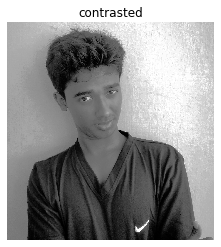

In [20]:
from skimage import exposure

image_contrasted=exposure.equalize_hist(gray_scale1)

show_image(image_contrasted,'contrasted')

**Transformations - Rotating, Rescaling, Resizing**

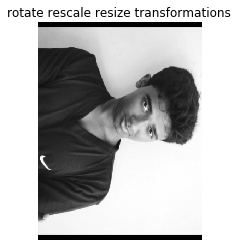

In [23]:
from skimage.transform import rotate,rescale,resize

image_rotated=rotate(gray_scale1,-90)
image_rescaled=rescale(image_rotated,1/4,anti_aliasing=True,multichannel=False)
image_resized=resize(image_rescaled,(400,300),anti_aliasing=True)

show_image(image_resized,'rotate rescale resize transformations')

**EDGE DETECTION using SOBEL FILTER**

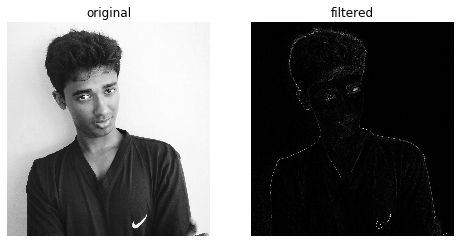

In [28]:
from skimage.filters import sobel

edge_sobel=sobel(gray_scale1)

plot_comparision(gray_scale1,edge_sobel,"EdgeDetection with sobel")

Noise - Images are signals. Noise is a result of error in image acquisition

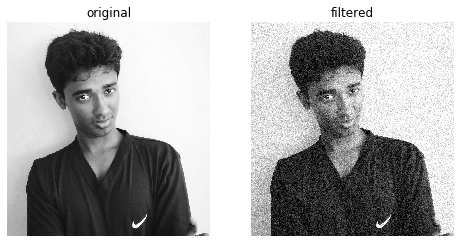

In [29]:
#Adding Noise to the image
from skimage.util import random_noise
noicy_image=random_noise(gray_scale1)

plot_comparision(gray_scale1,noicy_image,'Noise added Image')

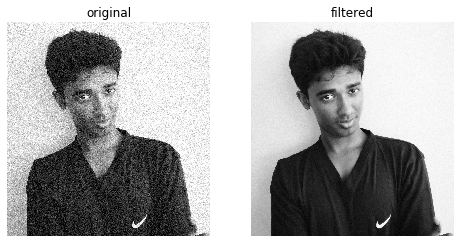

In [30]:
#Removing Noise from the Image

from skimage.restoration import denoise_tv_chambolle
denoised_image=denoise_tv_chambolle(noicy_image,weight=0.1,multichannel=False)

plot_comparision(noicy_image,denoised_image,'Noise removal')

**SUPERVISED SEGMENTATION USING SKIMAGE SLIC**

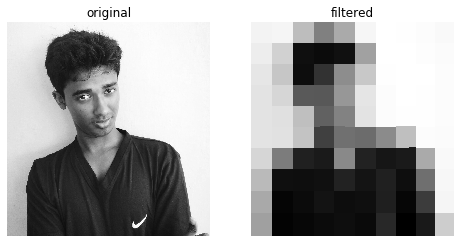

In [38]:
from skimage.segmentation import slic
from skimage.color import label2rgb

segments=slic(gray_scale1)
segmented_image=label2rgb(segments,gray_scale1,kind='avg')

plot_comparision(gray_scale1,segmented_image,"image segmentation using slic")

**SUPERVISED FACE DETECTION using SKIMAGE CASCADE**

In [45]:
from skimage.feature import Cascade
trained_file=data.lbp_frontal_face_cascade_filename()
detector=Cascade(trained_file)

detected=detector.detect_multi_scale(img=gray_scale1,
                                     scale_factor=1.2,
                                     step_ratio=1,
                                     min_size=(3,3),
                                     max_size=(20,20))
print(detected)

[]
